# ПРОГНОЗ НА БУДУЩЕЕ

### Дополнительный материал

Prophet

1. Выполните вышеуказанные шаги используя в качестве источника временной ряд с заболеваемостью.
Ссылка на временные ряды
https://github.com/GoogleCloudPlatform/covid-19-open-data
2. Посчитайте точность для найденных параметров и сравнить с тем, что было.
3. Построить модель SARIMAX, подобрать параметры.
4. Построить модель Prophet.

In [184]:
import pandas as pd
data = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv")

In [185]:
data

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12525820,2022-09-09,ZW,11.0,0.0,NaN,NaN,256870.0,5596.0,NaN,NaN
12525821,2022-09-10,ZW,18.0,0.0,NaN,NaN,256888.0,5596.0,NaN,NaN
12525822,2022-09-11,ZW,0.0,0.0,NaN,NaN,256888.0,5596.0,NaN,NaN
12525823,2022-09-12,ZW,51.0,0.0,NaN,NaN,256939.0,5596.0,NaN,NaN


In [186]:
data_ru = data.loc[data['location_key'] == 'RU']
data_ru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 9675250 to 9676236
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  987 non-null    object 
 1   location_key          987 non-null    object 
 2   new_confirmed         987 non-null    float64
 3   new_deceased          987 non-null    float64
 4   new_recovered         0 non-null      float64
 5   new_tested            470 non-null    float64
 6   cumulative_confirmed  987 non-null    float64
 7   cumulative_deceased   987 non-null    float64
 8   cumulative_recovered  0 non-null      float64
 9   cumulative_tested     581 non-null    float64
dtypes: float64(8), object(2)
memory usage: 84.8+ KB


In [187]:
data_ru.drop(columns=['new_recovered','cumulative_recovered', 'cumulative_tested', 'new_tested', 'location_key'], inplace=True)
data_ru['date'] = pd.to_datetime(data_ru['date'])

<ipython-input-187-86a72cacd3a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ru.drop(columns=['new_recovered','cumulative_recovered', 'cumulative_tested', 'new_tested', 'location_key'], inplace=True)
<ipython-input-187-86a72cacd3a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ru['date'] = pd.to_datetime(data_ru['date'])


In [188]:
data_ru

,date,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased
9675250,2020-01-02,0.0,0.0,0.0,0.0
9675251,2020-01-03,0.0,0.0,0.0,0.0
9675252,2020-01-04,0.0,0.0,0.0,0.0
9675253,2020-01-05,0.0,0.0,0.0,0.0
9675254,2020-01-06,0.0,0.0,0.0,0.0
...,...,...,...,...,...
9676232,2022-09-10,52829.0,86.0,20066610.0,385348.0
9676233,2022-09-11,46488.0,81.0,20113098.0,385429.0
9676234,2022-09-12,44045.0,101.0,20157143.0,385530.0
9676235,2022-09-13,51735.0,98.0,20208878.0,385628.0


<Axes: >

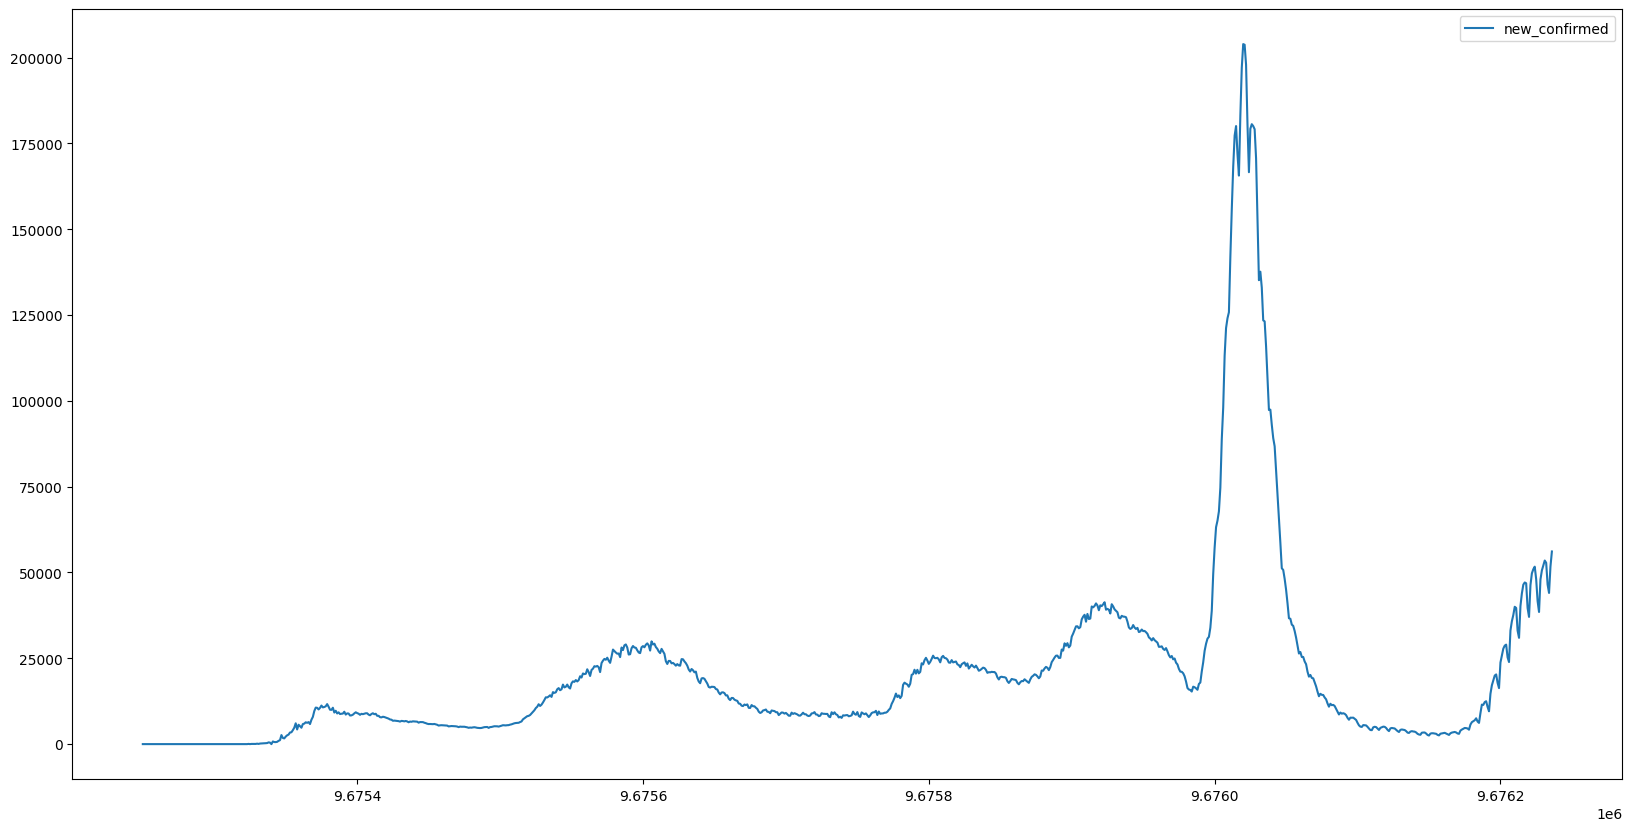

In [189]:
data_ru.plot(y='new_confirmed', figsize=(20, 10))

In [190]:
data_ru.set_index('date', inplace = True)

In [191]:
y = data_ru['new_confirmed']

In [192]:
train = y[:'2022-03-12']

test = y['2022-03-12':]

In [193]:
from statsmodels.tsa.stattools import adfuller

# тест Дики-Фуллера для проверки стационарности
result = adfuller(y)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# если p-value < 0.05, ряд стационарен, и d = 1, что и есть в данном случае
y_diff = y.diff().dropna()
result_diff = adfuller(y_diff.dropna())

# если p-value > 0.05, ряд нестационарен — применяем дифференцирование
print('ADF Statistic после 1 дифференцирования:', result_diff[0])
print('p-value после 1 дифференцирования:', result_diff[1])

ADF Statistic: -2.9424168377560664
p-value: 0.04063317992712602
ADF Statistic после 1 дифференцирования: -7.867648491264337
p-value после 1 дифференцирования: 5.083861830008356e-12


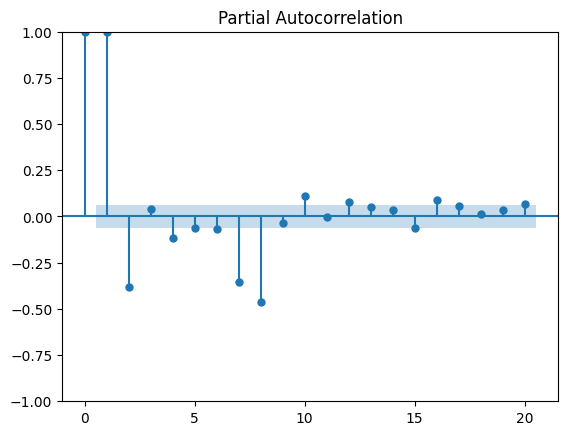

In [194]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plot_pacf(y, lags=20)
plt.show()

In [195]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(train,
                #.     p  d  q
                order=(1, 1, 1), # несезонные компоненты модели
                seasonal_order=(1, 0, 1, 2)) # сезонные компоненты модели

result = model.fit()

results = model.fit(disp=False)
print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                     new_confirmed   No. Observations:                  801
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 2)   Log Likelihood               -7187.224
Date:                           Wed, 23 Apr 2025   AIC                          14384.448
Time:                                   20:09:25   BIC                          14407.871
Sample:                               01-02-2020   HQIC                         14393.446
                                    - 03-12-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3078      0.020    -15.126      0.000      -0.348      -0.268
ma.L1          0.8390      0.015     55.167

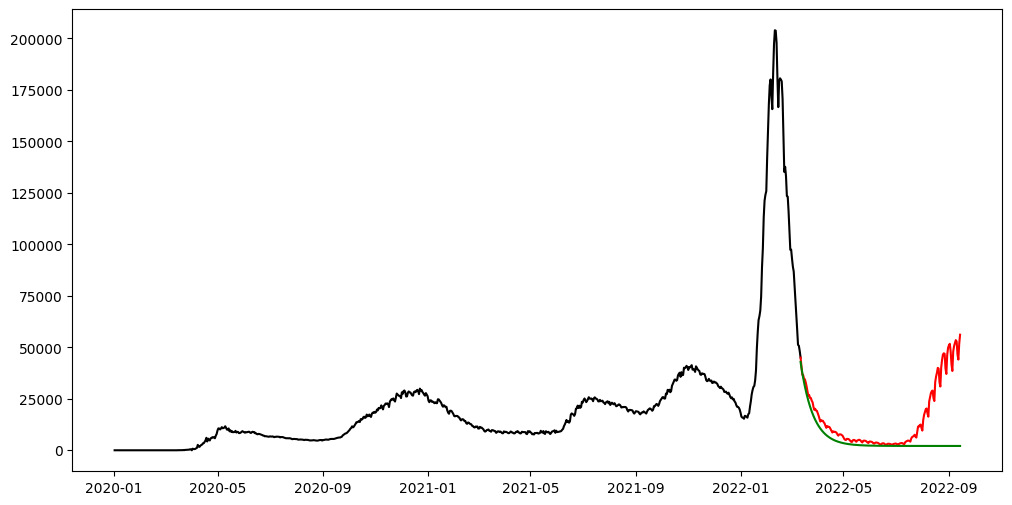

In [196]:
import matplotlib.pyplot as plt

start = len(train)
end = len(train) + len(test) - 1

# применим метод predict
predictions = result.predict(start=start, end=end)

# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, color='black', label='Обучающая выборка')
plt.plot(test.index, test, color='red', label='Тестовая выборка')
plt.plot(test.index, predictions, color='green', label='Прогноз')

<ipython-input-199-7f15eb92b1b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ru.drop(columns=['new_recovered','cumulative_recovered', 'cumulative_tested', 'new_tested', 'location_key'], inplace=True)
<ipython-input-199-7f15eb92b1b6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ru['date'] = pd.to_datetime(data_ru['date'])
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0i57c_8x/lsoxx5vy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0i57c_8x/zujxkr7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args

RMSE на тестовом периоде: 80575.25161087746


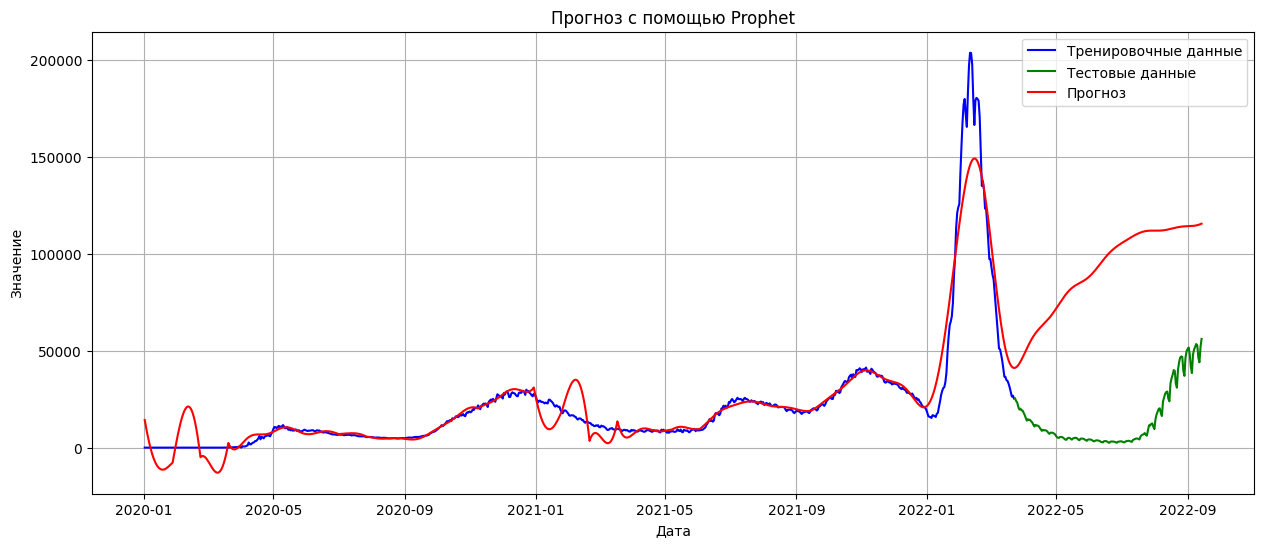

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error

data_ru = data.loc[data['location_key'] == 'RU']
data_ru.drop(columns=['new_recovered','cumulative_recovered', 'cumulative_tested', 'new_tested', 'location_key'], inplace=True)
data_ru['date'] = pd.to_datetime(data_ru['date'])

prophetdf = pd.DataFrame()
prophetdf['ds'] = data_ru['date']
prophetdf['y'] = data_ru['new_confirmed']

prophetdf_train = prophetdf[:-175]
prophetdf_test = prophetdf[-175:]

model = Prophet(weekly_seasonality=False,
                yearly_seasonality=True,
                daily_seasonality=True,
                changepoint_range=0.8,
                changepoint_prior_scale=0.5,
                seasonality_prior_scale=0.01)
model.fit(prophetdf_train)

future = model.make_future_dataframe(periods=175, freq='D')
predictions = model.predict(future)

test_predictions = predictions[-175:]

rmse = np.sqrt(mean_squared_error(prophetdf_test['y'], test_predictions['yhat']))
print(f"RMSE на тестовом периоде: {rmse}")

plt.figure(figsize=(15, 6))

plt.plot(prophetdf_train['ds'], prophetdf_train['y'], label="Тренировочные данные", color='blue')
plt.plot(prophetdf_test['ds'], prophetdf_test['y'], label="Тестовые данные", color='green')

plt.plot(predictions['ds'], predictions['yhat'], label="Прогноз", color='red')


plt.title("Прогноз с помощью Prophet")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()